<a href="https://colab.research.google.com/github/Ehsan-Taheri/Image-Classification-Mnist/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras


In [5]:
mnist=tf.keras.datasets.mnist

In [6]:
(train_data,train_labels),(test_data,test_labels)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
train_data.shape

(60000, 28, 28)

In [8]:
test_data.shape

(10000, 28, 28)

3


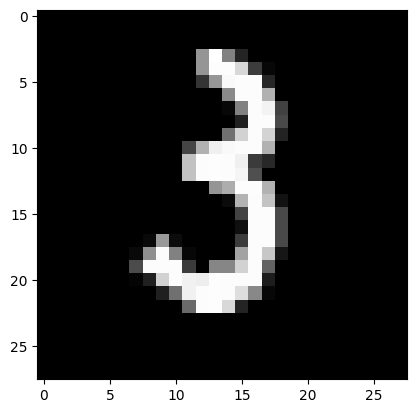

In [9]:
idx=1234
img=train_data[idx]
print(train_labels[idx])
plt.imshow(img,cmap='gray')

In [10]:
print(train_data.min())
print(train_data.max())

0
255


In [11]:
train_data=train_data/255.0
test_data=test_data/255.0

In [12]:
print(train_data.min())
print(train_data.max())

0.0
1.0


## Model Definition

In [13]:
model=keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=10,activation='softmax'))


In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.build(input_shape=(None,28,28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history=model.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8809 - loss: 0.4108 - val_accuracy: 0.9617 - val_loss: 0.1219
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9707 - loss: 0.0970 - val_accuracy: 0.9703 - val_loss: 0.0961
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9787 - loss: 0.0671 - val_accuracy: 0.9744 - val_loss: 0.0814
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9843 - loss: 0.0480 - val_accuracy: 0.9771 - val_loss: 0.0750
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9878 - loss: 0.0371 - val_accuracy: 0.9765 - val_loss: 0.0784
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9898 - loss: 0.0298 - val_accuracy: 0.9766 - val_loss: 0.0791
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9921 - loss: 0.0259 - val_accuracy: 0.9767 - val_loss: 0.0923
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9937 - loss: 0.0201 - 

In [16]:
model.evaluate(test_data,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9725 - loss: 0.1193


[0.09301535785198212, 0.9771999716758728]

6


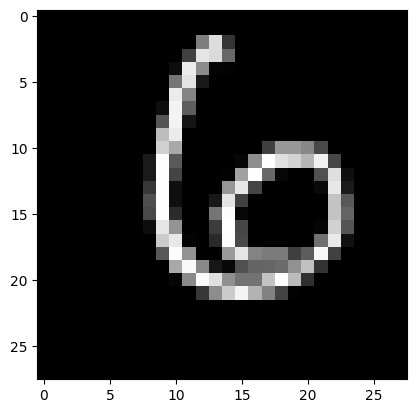

In [33]:
idx=100
img=test_data[idx]

print(test_labels[idx])
plt.imshow(img,cmap='gray')



In [57]:

img=np.reshape(img,(-1,28,28))
prediction=model.predict(img)
print(prediction)
prediction_lable=np.argmax(prediction)
print(f"predicted_lable : {prediction_lable} ")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1.5486645e-08 3.8097556e-10 1.1217370e-10 1.6008167e-12 9.5974288e-12
  1.0467522e-08 1.0000000e+00 4.6591219e-13 1.3824154e-10 7.7290157e-14]]
predicted_lable : 6 


In [39]:
print(model.input_shape)

(None, 28, 28)


In [44]:
val=history.history["loss"]
val_loss=history.history["val_loss"]

acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]


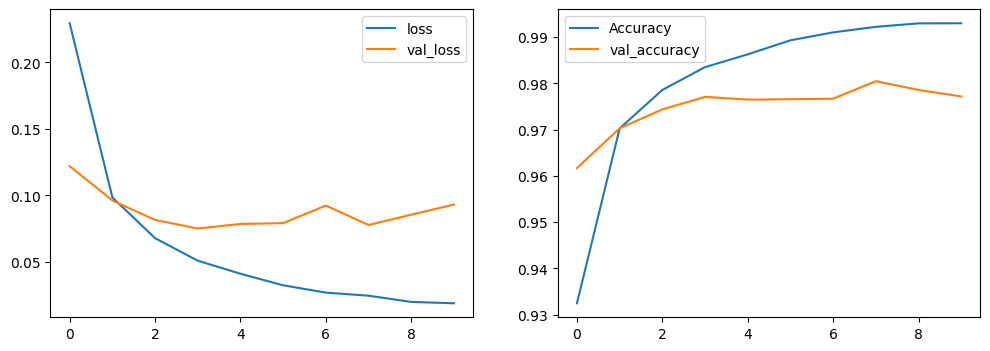

In [58]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

plt.plot(val,label="loss")
plt.plot(val_loss,label="val_loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(acc,label='Accuracy')
plt.plot(val_acc,label='val_accuracy')
plt.legend()